In [1]:
from fastai.imports import *
from fastai.vision.all import *
#from fastbook import *
from fastai.vision.widgets import *

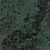

In [2]:
#PATH = "/kaggle/input/testset/data/train"
PATH = "/Users/jorgen/Documents/jørgen/Uib/DAT255/Assignment/Git/data/interim/Train"
#os.chdir(PATH)
#os.listdir()
im = PILImage.create(PATH+"/no_pools/img1194.jpg")
im

In [3]:
poolDetection = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
dls = poolDetection.dataloaders(PATH)

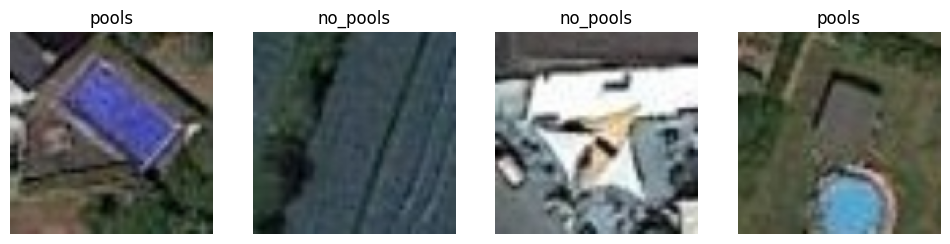

In [5]:
dls.valid.show_batch(max_n=4, nrows=1)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/urllib/request.py", line 1346, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 1255, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 1301, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 1250, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 1010, in _send_output
    self.send(msg)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 950, in send
    self.co

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Turning into model

In [ ]:
learn.export('firstModel.pkl')

In [7]:
#!pip install gradio
import timm
import gradio as gr

In [8]:
learn= load_learner('/Users/jorgen/Documents/jørgen/Uib/DAT255/Assignment/Git/models/firstModel.pkl')

In [9]:
from PIL import Image

In [10]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    
    
    # Convert the image to a PIL image
    #img = Image.open(img)
    # Use the model to generate a prediction
    #pred, pred_idx, probs = learn.predict(img)
    return {'prediction': str(pred), 'probability': float(probs[pred_idx])}


In [13]:
#learn.predict(im)
#learn.model.eval(im)

In [11]:
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(1024, 1024)), outputs=gr.outputs.Label(num_top_classes=5)).launch(share=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0b5b19fe-f964-4393.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/routes.py", line 344, in run_predict
    output = await app.get_blocks().process_api(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/blocks.py", line 1012, in process_api
    result = await self.call_function(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gradio/blocks.py", line 830, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3